Error loading cleaned_data: [Errno 2] No such file or directory: 'cleaned_data.csv'
Error loading final_fully_integrated_data: [Errno 2] No such file or directory: 'final_fully_integrated_data.csv'
raceId           int64
driverId         int64
lap              int64
position         int64
time            object
milliseconds     int64
dtype: object
resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object
raceId          int64
year            int64
round           int64
circuitId       int64
name           object
date           object
time           obj

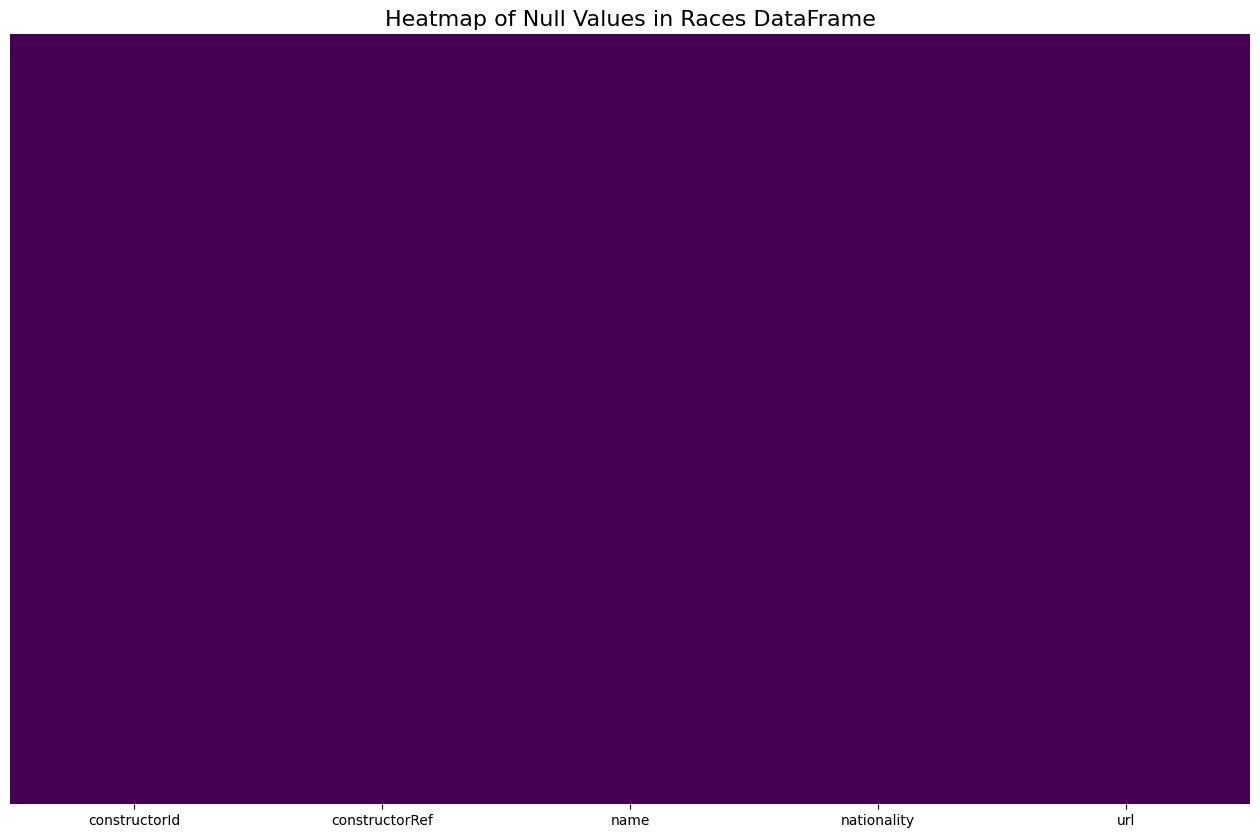

,circuitId,name,milliseconds
28,1,RB F1 Team,84876.478261
29,1,Racing Point,90440.789474
33,1,Spyker,93105.318182
37,1,Toyota,95111.016467
15,1,Honda,96319.961404
...,...,...,...
1031,80,Haas F1 Team,103992.066667
1037,80,Williams,104708.685714
1028,80,Alpine F1 Team,104966.554878
1026,80,Alfa Romeo,108320.900000


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Define file paths
file_paths = {
    "driver_standings": "driver_standings.csv",
    "drivers": "drivers.csv",
    "lap_times": "lap_times.csv",
    "pit_stops": "pit_stops.csv",
    "qualifying": "qualifying.csv",
    "races": "races.csv",
    "results": "results.csv",
    "seasons": "seasons.csv",
    "sprint_results": "sprint_results.csv",
    "status": "status.csv",
    "circuits": "circuits.csv",
    "constructor_results": "constructor_results.csv",
    "constructor_standings": "constructor_standings.csv",
    "constructors": "constructors.csv",
    "cleaned_data": "cleaned_data.csv",
    "final_fully_integrated_data": "final_fully_integrated_data.csv"
}

# Load all datasets
dataframes = {}
for name, path in file_paths.items():
    try:
        dataframes[name] = pd.read_csv(path)
    except Exception as e:
        dataframes[name] = None
        print(f"Error loading {name}: {e}")

# Display dataset structures
{key: df.shape for key, df in dataframes.items() if df is not None}


# Merge lap_times with races and results to get team and circuit info
lap_times = dataframes["lap_times"]
races = dataframes["races"]
results = dataframes["results"]
constructors = dataframes["constructors"]
imp_df = [lap_times,  results,races,constructors]

for df in imp_df:
    df.replace('\\N', np.nan, inplace=True)
    print(df.dtypes)    
plt.figure(figsize=(16, 10))

# Create a heatmap to visualize null values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Add title and display the heatmap
plt.title('Heatmap of Null Values in Races DataFrame', fontsize=16)
plt.show()

# Merge lap_times with races to get circuit info
lap_times = lap_times.merge(races[['raceId', 'circuitId', 'year']], on='raceId', how='left')

# Merge with results to get driver-constructor mapping
lap_times = lap_times.merge(results[['raceId', 'driverId', 'constructorId']], on=['raceId', 'driverId'], how='left')

# Merge with constructors to get team names
lap_times = lap_times.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')

# Compute average lap time per circuit and team
lap_time_efficiency = lap_times.groupby(['circuitId', 'name'])['milliseconds'].mean().reset_index()

# Rank teams based on efficiency (lower lap time is better)
lap_time_efficiency = lap_time_efficiency.sort_values(by=['circuitId', 'milliseconds'])

# Display the top teams per circuit
lap_time_efficiency